In [1]:
#import das bibliotecas
from scipy.io import wavfile
from numpy.fft import fft, ifft, fftfreq, fftshift, ifftshift
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio as play


In [2]:
# funcao para plotar o espectro do audio
def spectrum(audio_fft):
# 
# x_freq: vetor no domínio da frequência, complexo
#
    x_magnitude = np.abs(audio_fft)
    # Normalização para o valor máximo ser 0dB
    x_magnitude /= np.max(x_magnitude)
    return 20*np.log10(x_magnitude)

In [3]:
# obtendo taxa de amostragem e vetor de audio 
taxa_amostragem, audio = wavfile.read('01.wav')

# Numero de amostras no vetor do audio
n_amostras = len(audio)
tempo = np.zeros(n_amostras)
freq = 44100

t_amostra = 14/n_amostras

for amostra in range(1, n_amostras):

    tempo[amostra] = tempo[amostra - 1] + t_amostra

# toca o audio com ruido
play(audio, rate=taxa_amostragem)

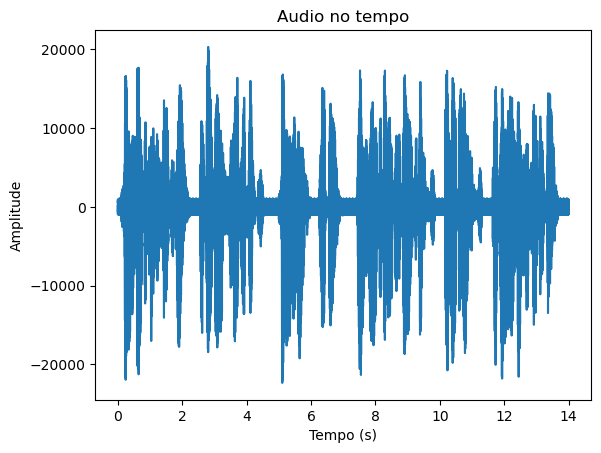

In [4]:
# plotando o audio no tempo
plt.plot(tempo, audio)
plt.title('Audio no tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.show()

In [5]:
# organizando os elementos transformada de fourrier    
audio_fft = fftshift(fft(audio))

# frequencias que compoem o audio 
audio_freqs = fftfreq(n_amostras, d = 1 / n_amostras)

# organizando as frequencias que compoem o audio, centrando no zero
audio_freqs = fftshift(audio_freqs) 

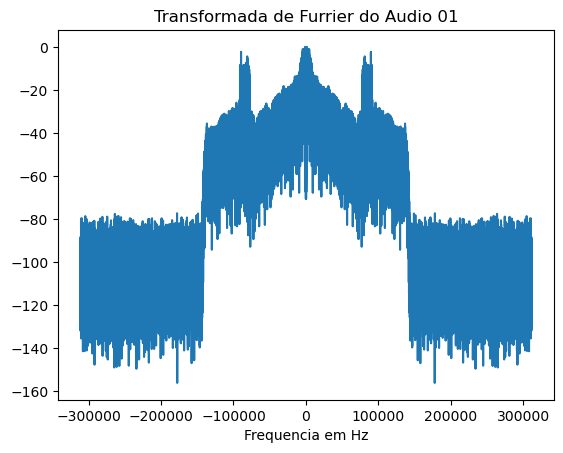

In [6]:
# plot do sinal no dominio da frequencia 
plt.plot(audio_freqs , spectrum(audio_fft))
plt.title("Transformada de Furrier do Audio 01")
plt.xlabel("Frequencia em Hz")
plt.show()

In [7]:
def filtro_hamming(sinal, wc, L):

    n_amostras = sinal.size
    alpha = (L - 1)/2
    coeficientes = np.zeros(L)
    janela_func = np.zeros(L) 
    
    sinal_filtrado = np.zeros(n_amostras)

    for i in range(L - 1):
        if 0 <= i <= (L - 1):
            coeficientes[i] = np.sin(wc*(i - alpha))/(np.pi*(i - alpha))
        else:
            coeficientes[i] = 0

    for i in range(L - 1):
        if 0 <= i <= (L - 1):
            janela_func[i] = 0.54 - 0.46*np.cos(2*np.pi*i)/(L - 1)
        else:
            janela_func[i] = 0
    
    for n in range(n_amostras):
        sinal_filtrado[n] = 0
        for k in range(L-1):
            if (n - k) <= 0 or (n - k) >= n_amostras:
                sinal_filtrado[n] += 0
            else:
                sinal_filtrado[n] += (coeficientes[k] * janela_func[k]) * sinal[n - k]
    
    return sinal_filtrado

In [8]:
def filtro_retangular(sinal, wc, L):

    n_amostras = sinal.size
    alpha = (L - 1)/2
    coeficientes = np.zeros(L)
    janela_func = np.zeros(L) 
    
    sinal_filtrado = np.zeros(n_amostras)

    for i in range(L - 1):
        if 0 <= i <= (L - 1):
            coeficientes[i] = np.sin(wc*(i - alpha))/(np.pi*(i - alpha))
        else:
            coeficientes[i] = 0

    for i in range(L - 1):
        if 0 <= i <= (L - 1):
            janela_func[i] = 1
        else:
            janela_func[i] = 0
    
    for n in range(n_amostras):
        sinal_filtrado[n] = 0
        for k in range(L-1):
            if (n - k) <= 0 or (n - k) >= n_amostras:
                sinal_filtrado[n] += 0
            else:
                sinal_filtrado[n] += (coeficientes[k] * janela_func[k]) * sinal[n - k]
    
    return sinal_filtrado

In [9]:
L = 88; wc = 2*np.pi/11

audio_filtrado_hamming = filtro_hamming(audio, wc, L)
audio_filtrado_retangular = filtro_retangular(audio, wc, L)

In [10]:
play(audio_filtrado_hamming, rate=taxa_amostragem)

In [11]:
play(audio_filtrado_retangular, rate=taxa_amostragem)

In [13]:
# organizando os elementos transformada de fourrier    
audio_filtrado_freq_h = fftshift(fft(audio_filtrado_hamming))
audio_filtrado_freq_r = fftshift(fft(audio_filtrado_retangular))

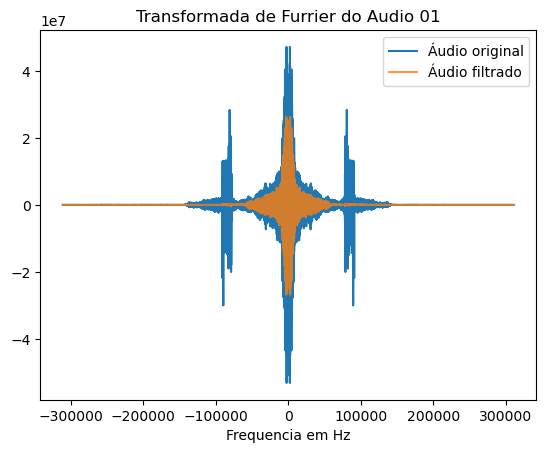

In [15]:
# plot do sinal no dominio da frequencia 
plt.plot(audio_freqs, np.real(audio_fft), label='Áudio original')
plt.plot(audio_freqs, np.real(audio_filtrado_freq_h), alpha=0.8, label='Áudio filtrado')
plt.title("Transformada de Furrier do Audio 01")
plt.xlabel("Frequencia em Hz")
plt.legend()
plt.show()

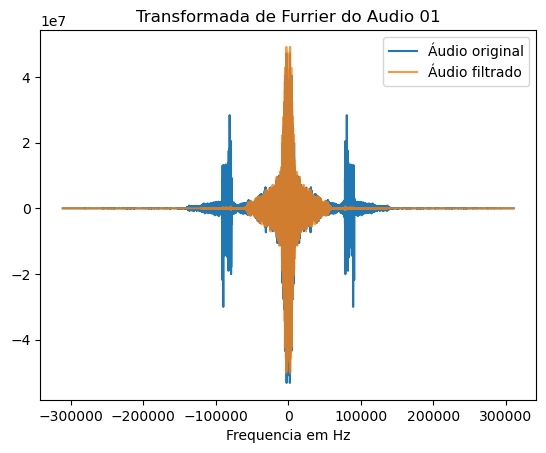

In [14]:
# plot do sinal no dominio da frequencia 
plt.plot(audio_freqs, np.real(audio_fft), label='Áudio original')
plt.plot(audio_freqs, np.real(audio_filtrado_freq_r), alpha=0.8, label='Áudio filtrado')
plt.title("Transformada de Furrier do Audio 01")
plt.xlabel("Frequencia em Hz")
plt.legend()
plt.show()

In [ ]:
# plot do sinal no dominio da frequencia 
plt.plot(audio_freqs, spectrum(audio_fft), label='Áudio original')
plt.plot(audio_freqs, spectrum(audio_filtrado_freq), alpha=0.8, label='Áudio filtrado')
plt.title("Transformada de Furrier do Audio 01")
plt.xlabel("Frequencia em Hz")
plt.legend()
plt.show()

In [ ]:
# fases dos elementos da tranformada do vetor Audio
    
audio_fft_phases = np.angle(audio_fft)


filtered_audio = audio_fft.copy()

# frequencia de corte  
Wc = 70000 # Hz

# Filtragem bruta na frequencia, elimina os elementos que estao fora da
# faixa de corte
    
for i in range(n_amostras):

    if np.abs(audio_freqs[i]) > Wc:

        filtered_audio[i] = 0


# coloca os elementos na ordem original, nao mais centrados na freq 0
    
recovered_audio_tempo = ifftshift(filtered_audio)

# transformada inversa de furrier e selecao da parte real 
    
recovered_audio_tempo = np.real(ifft(recovered_audio_tempo))

In [ ]:
plt.plot(audio_freqs,np.abs(filtered_audio))
plt.title('Audio Filtrado na frequência')
plt.ylabel('Amplitude')
plt.xlabel('Frequência (Hz)')
plt.show()

In [ ]:
plt.plot(recovered_audio_tempo)
plt.title('Audio Filtrado no tempo')
plt.ylabel('Amplitude')
plt.xlabel('Numero de amostras')
plt.show()

In [ ]:
wavfile.write("vec_audio.wav", taxa_amostragem, recovered_audio_tempo.astype(np.int16))
play("vec_audio.wav", rate=taxa_amostragem)